In [1]:
%matplotlib inline

In [85]:
import glob
import os
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits

from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
def init():
    '''
    Initialise first frame with first image
    '''
    im.set_array(f(images[0]))
    return (im,)

def f(filename):
    '''
    Frame update function
    '''
    return fits.open(filename)[0].data[0,0,:,:]

def updatefig(i, *args):
    '''
    Update image data for frame.
    '''
    im.set_array(f(images[i]))
    i += 1
    return im,

In [129]:
# Images to make frames

images = np.array(sorted(glob.glob("/data/imageport_parallel/2017-02-25T04:1?:??-S*-B*.fits")))
images = np.append(images, sorted(glob.glob("/data/imageport_parallel/2017-02-25T04:2?:??-S*-B*.fits")))

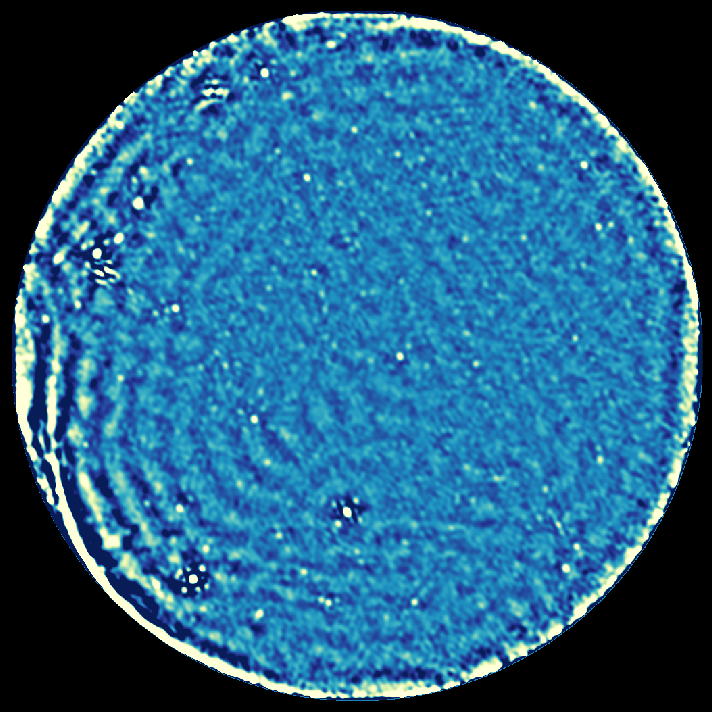

In [130]:
cmap = matplotlib.cm.YlGnBu_r
cmap.set_bad('black')

fig = plt.figure(figsize=(10,10))

plt.xticks([])
plt.yticks([])
plt.rcParams['figure.facecolor'] = 'black'

i = 0
im = plt.imshow(f(images[i]), vmin=-30, vmax = 80, animated=True, cmap=cmap, origin='lower')

plt.tight_layout()

ani = animation.FuncAnimation(fig, updatefig, interval=100, frames=len(images), blit=True)

In [120]:
# Breaks if too large

video = HTML(ani.to_html5_video())

In [131]:
#  Save video

t1 = time.time()
ani.save("herc_a_scintillaton_fluxcal.mp4")
print time.time() -  t1, "seconds for", len(images), "frames."

300.830555916 seconds for 1189 frames.
